# <font color='green'>NEW: Trying KNN</font>

In [52]:
# Implementation: Creating Clusters

In [53]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [54]:
# Load data from csv file
ats_data = np.genfromtxt(
    fname ='mydata.csv', delimiter= ',', dtype= float)

In [55]:
ats_data

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  46.,   40.,  119., ...,   31.,  131.,  142.],
       [  47.,   37.,  119., ...,   29.,  133.,  143.],
       ..., 
       [  68.,   75.,  108., ...,  100.,  104.,   85.],
       [  71.,   87.,  108., ...,   91.,  104.,   85.],
       [  71.,   91.,  100., ...,   91.,  100.,   81.]])

In [56]:
ats_data = np.delete(arr = ats_data, obj=0, axis = 0)

In [57]:
ats_data

array([[  46.,   40.,  119., ...,   31.,  131.,  142.],
       [  47.,   37.,  119., ...,   29.,  133.,  143.],
       [  80.,   95.,  100., ...,   83.,   96.,   74.],
       ..., 
       [  68.,   75.,  108., ...,  100.,  104.,   85.],
       [  71.,   87.,  108., ...,   91.,  104.,   85.],
       [  71.,   91.,  100., ...,   91.,  100.,   81.]])

In [58]:
ats_data.shape

(5100, 36)

In [59]:
z = np.zeros((5100,1), dtype=float)

In [60]:
ats_data = np.append(ats_data, z, axis=1)

In [61]:
ats_data

array([[  46.,   40.,  119., ...,  131.,  142.,    0.],
       [  47.,   37.,  119., ...,  133.,  143.,    0.],
       [  80.,   95.,  100., ...,   96.,   74.,    0.],
       ..., 
       [  68.,   75.,  108., ...,  104.,   85.,    0.],
       [  71.,   87.,  108., ...,  104.,   85.,    0.],
       [  71.,   91.,  100., ...,  100.,   81.,    0.]])

In [62]:
ats_data.shape

(5100, 37)

In [63]:
# A New column has just been created in order to put the class (0 => non outlier / 1 => outlier)

In [64]:
X = ats_data[:, range(0,36)]

In [65]:
X

array([[  46.,   40.,  119., ...,   31.,  131.,  142.],
       [  47.,   37.,  119., ...,   29.,  133.,  143.],
       [  80.,   95.,  100., ...,   83.,   96.,   74.],
       ..., 
       [  68.,   75.,  108., ...,  100.,  104.,   85.],
       [  71.,   87.,  108., ...,   91.,  104.,   85.],
       [  71.,   91.,  100., ...,   91.,  100.,   81.]])

In [66]:
Y = ats_data[:, 36]

In [67]:
Y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [68]:
# Now we divide the data so we can have a train_data and test_data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
Y_test = y_test.ravel()

In [70]:
y_train

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [71]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print ("Accuracy is {} for K-Value: {}".format(accuracy_score(y_test,y_pred)*100,K_value))

Accuracy is 100.0 for K-Value: 1
Accuracy is 100.0 for K-Value: 2
Accuracy is 100.0 for K-Value: 3
Accuracy is 100.0 for K-Value: 4
Accuracy is 100.0 for K-Value: 5
Accuracy is 100.0 for K-Value: 6
Accuracy is 100.0 for K-Value: 7
Accuracy is 100.0 for K-Value: 8
Accuracy is 100.0 for K-Value: 9
Accuracy is 100.0 for K-Value: 10
Accuracy is 100.0 for K-Value: 11
Accuracy is 100.0 for K-Value: 12
Accuracy is 100.0 for K-Value: 13
Accuracy is 100.0 for K-Value: 14
Accuracy is 100.0 for K-Value: 15
Accuracy is 100.0 for K-Value: 16
Accuracy is 100.0 for K-Value: 17
Accuracy is 100.0 for K-Value: 18
Accuracy is 100.0 for K-Value: 19
Accuracy is 100.0 for K-Value: 20
Accuracy is 100.0 for K-Value: 21
Accuracy is 100.0 for K-Value: 22
Accuracy is 100.0 for K-Value: 23
Accuracy is 100.0 for K-Value: 24
Accuracy is 100.0 for K-Value: 25


In [5]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
cols = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","V29","V30","V31","V32","V33","V34","V35","V36"]

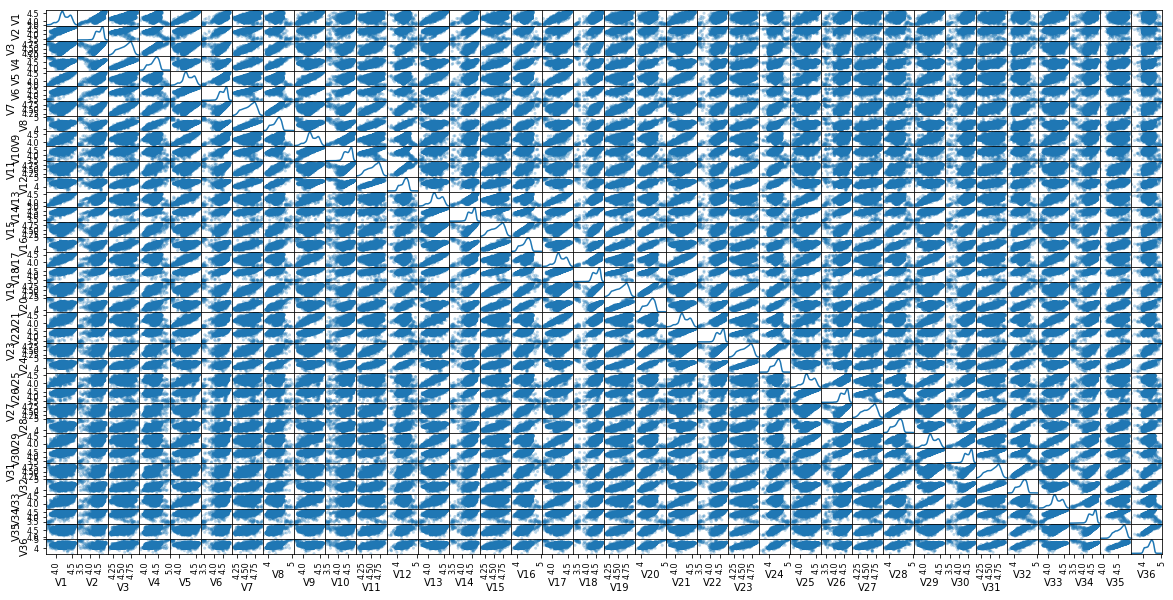

In [7]:
# Scaling the data using the natural logarithm
log_data = np.log(data)

# Scaling the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (20,10), diagonal = 'kde');

In [8]:
import itertools
# Find the indexes of the outliers
outliers_lst  = []

# Find extreme values (quartiles) for each features
for feature in log_data.columns:
    # Q1 (25th percentile)
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # Q3 (75th percentile)
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # outlier step = 1.5 x (Interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # Display the outliers
    # print ('Data points considered outliers for the feature {}:'.format(feature))
    # display(outliers_rows)

    # fill the outlier list
    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# Sets is used to take off duplicates
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print ('Outliers list:\n', uniq_outliers)
print ('Length of outliers list:\n', len(uniq_outliers))

print ('Duplicate list:\n', dup_outliers)
print ('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print ('Original shape of data:\n', data.shape)
# Processed Data
print ('New shape of data:\n', good_data.shape)

Outliers list:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 2053, 10, 3083, 3084, 13, 11, 3082, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 2606, 47, 2095, 50, 51, 54, 56, 57, 58, 59, 60, 12, 62, 63, 4674, 67, 68, 69, 66, 73, 114, 3701, 4727, 2681, 2682, 2176, 141, 1678, 1679, 1680, 1681, 158, 678, 4777, 4778, 196, 1733, 2247, 719, 2774, 2786, 2817, 276, 2337, 1313, 4387, 1828, 291, 2862, 2863, 2350, 2351, 1846, 2359, 2360, 1848, 1847, 328, 1352, 2388, 4436, 344, 350, 1887, 865, 362, 1903, 369, 3444, 387, 2948, 2949, 1413, 388, 389, 2443, 403, 3479, 418, 1956, 2473, 2474, 432, 3504, 2994, 4531, 2995, 969, 2512, 471, 3545, 2009, 3039, 3040, 4584, 4585, 4586, 2548, 2549, 2550, 3582]
Length of outliers list:
 143
Duplicate list:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 388, 10, 3083, 1680, 13, 12, 1679, 16, 17, 18, 19, 20, 21, 403, 23, 24, 3479, 26, 27, 28, 29, 31, 32, 33, 35, 4387, 38, 39, 40, 41, 42, 2473, 44, 45, 2862, 47, 3504, 2350, 50, 2994, 2095, 54,

In [9]:
good_data.shape

(5026, 36)

#### <font color='blue'>Here we are trying to work with PCA to draw conclusions about the underlying structure of the features of the data. PCA is going to calculate the dimensions which best maximize variance. We therefore try to find combinations of features which best describes the data. PCA is most useful when the variance in a data set is distributed unevenly accross the dimensions. As the number of features in our data is high(36), we can gain some insights about the data set by reducing it to two or three dimensions.</font>

#### <font color='blue'>The below code is not working as I expected. I wanted to try PCA and first use the silouette score to determine the optimal number of clusters I can use the PCA with. In order to learn how PCA could be implemented in python I looked at the iris example contained in the sklearn library but here I got confused. Because in Iris the model is supervized (there are 'y') whereas our problem is unsupervized. I guess I could try to create a class with values 0 (non outliers) and 1 (outliers) from the outliers I found with different methods to apply the PCA but then I dont know whether it really make sense !</font>

In [29]:
from sklearn.decomposition import PCA

In [41]:
log_data.shape

(5100, 36)

In [50]:
?data

In [52]:
from sklearn.datasets import load_iris
f = load_iris()

In [56]:
f.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [42]:
pca = PCA(n_components=2)
reduced_log_data = pca.fit_transform(log_data)
#pca_data = pca.transform(log_data)
#pca_results = rs.pca_results(log_data, pca)

In [45]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_log_data)):
    if y[i] == 0:
        red_x.append(reduced_log_data[i][0])
        red_y.append(reduced_log_data[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_log_data[i][0])
        blue_y.append(reduced_log_data[i][1])
    else:
        green_x.append(reduced_log_data[i][0])
        green_y.append(reduced_log_data[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

NameError: name 'y' is not defined

In [43]:
fig = plt.figure(figsize=(20, 20))
plt.scatter(log_data[:,0], log_data[:,1], color=cols, s=2)

TypeError: unhashable type: 'slice'

In [41]:
pca = PCA(n_components=36)
pca.fit(good_data)

reduced_data = pca.transform(good_data)

pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = cols)

In [25]:
# GMM Implementation

In [ ]:
from sklearn.mixture import GMM

for n_clusters in range_n_clusters:

    clusterer = GMM(n_components=n_clusters).fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.means_

    sample_preds = clusterer.predict(pca_samples)

    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print ('For n_clusters = {}. The average silhouette_score is : {}'.format(n_clusters, score))

#### <font color='blue'>According to the above results, we select the score which is the closest to 1 and further from -1 to select the right number of centroids we want to  use</font>

In [52]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:

        gmm = mixture.GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

NameError: name 'mixture' is not defined

In [ ]:
# KNN implementation

In [54]:
# Loop through clusters
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_

    sample_preds = clusterer.predict(pca_samples)

    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ('For n_clusters = {}. The average silhouette_score is : {}'.format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.44208090324031174
For n_clusters = 3. The average silhouette_score is : 0.37697289024612274
For n_clusters = 4. The average silhouette_score is : 0.33091974843753136
For n_clusters = 5. The average silhouette_score is : 0.3710294610799196
For n_clusters = 6. The average silhouette_score is : 0.316659657523001
For n_clusters = 7. The average silhouette_score is : 0.3127000070646556
For n_clusters = 8. The average silhouette_score is : 0.27679322985721594
For n_clusters = 9. The average silhouette_score is : 0.25925832923086545
For n_clusters = 10. The average silhouette_score is : 0.257522604452611


In [55]:
clusterer = GMM(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

/Users/ssicard/Library/Python/3.4/lib/python/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssicard/Library/Python/3.4/lib/python/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssicard/Library/Python/3.4/lib/python/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ssicard/Library/Python/3.4/lib/python/site-p

In [13]:
import renders as rs
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

ImportError: No module named 'renders'